<a href="https://colab.research.google.com/github/kurmala/MLLAB10/blob/master/vishnulab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE

#Reading the values..
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2]:
df.shape

(1470, 35)

In [3]:
#To know about null values.
print(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

there no null values in the data set

Text(0.5, 1.0, 'Attrition Breakdown')

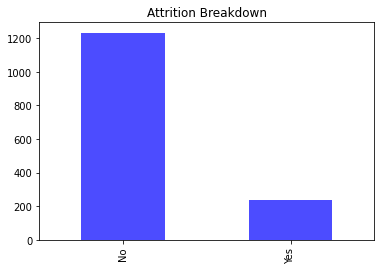

In [4]:
df.Attrition.value_counts().plot(kind='bar', color="blue", alpha=0.7)
plt.title("Attrition Breakdown")

Now let us know which feature has more impact on attrition

Text(0, 0.5, 'Frequency')

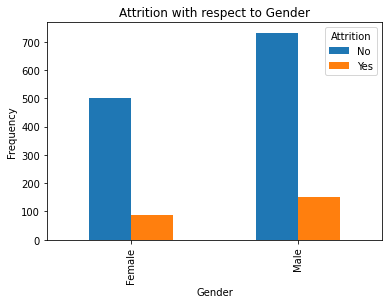

In [6]:
#Breakdown of attricutes with respect to gender...
pd.crosstab(df.Gender,df.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Attrition')

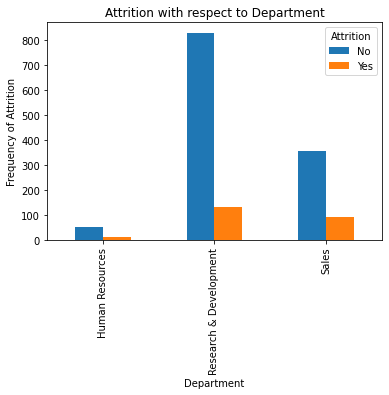

In [8]:
pd.crosstab(df.Department,df.Attrition).plot(kind='bar', stacked=False)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

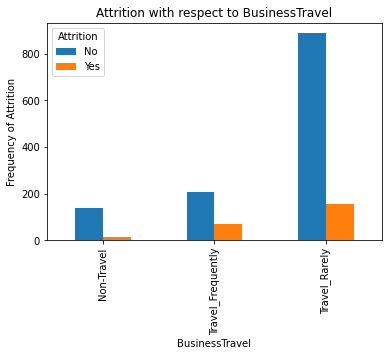

In [10]:
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')


Text(0, 0.5, 'Frequency of Attrition')

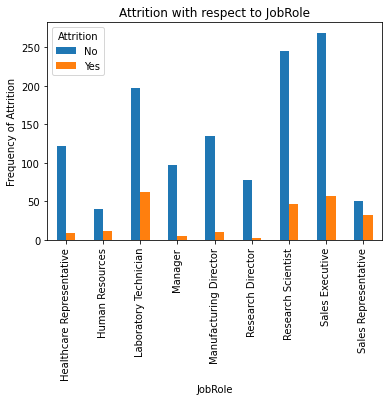

In [15]:
pd.crosstab(df.JobRole,df['Attrition']).plot(kind='bar', stacked=False)
plt.title('Attrition with respect to JobRole')
plt.xlabel('JobRole')
plt.ylabel('Frequency of Attrition')


Text(0, 0.5, 'Frequency of Attrition')

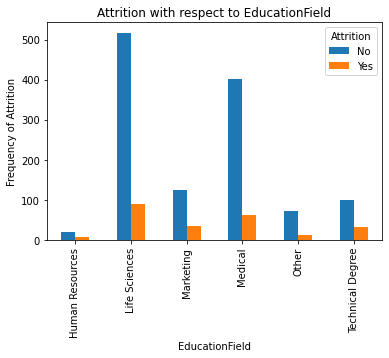

In [13]:
pd.crosstab(df.EducationField,df.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

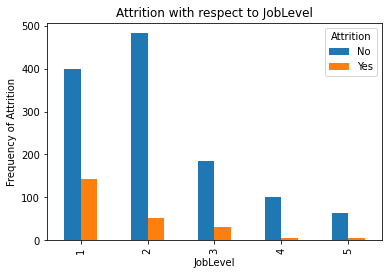

In [17]:
pd.crosstab(df.JobLevel,df.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

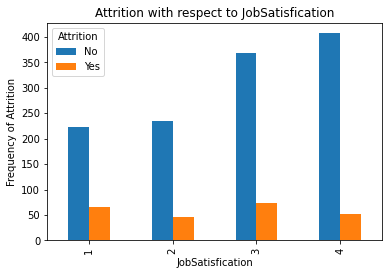

In [18]:
pd.crosstab(df.JobSatisfaction,df.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to JobSatisfication')
plt.xlabel('JobSatisfication')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

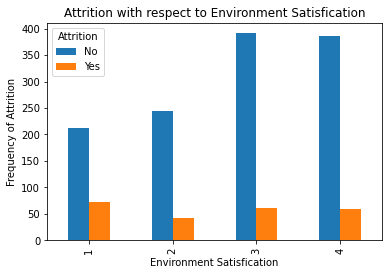

In [20]:
pd.crosstab(df.EnvironmentSatisfaction,df.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to Environment Satisfication')
plt.xlabel('Environment Satisfication')
plt.ylabel('Frequency of Attrition')

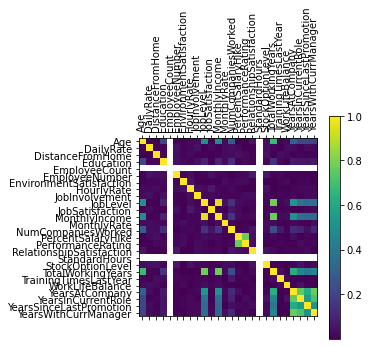

In [21]:
wcorr = df.corr()
plt.matshow(wcorr.abs())
plt.colorbar()
plt.xticks(range(len(wcorr.columns)), wcorr.columns, rotation='vertical');
plt.yticks(range(len(wcorr.columns)), wcorr.columns);

In [0]:
attrition_tar= df.drop(['Attrition'], axis=1)

In [0]:
y=df['Attrition']

Spliting data into two parts

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrition_tar,y,train_size= 0.80,random_state=0);


(1176, 34)
(1176,)
(294, 34)
(294,)


DATA PREPROCESSING

we will encode the features and catagorical data

In [0]:
def encoding(data):
    
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    
    attrition_num = data[numerical]
    
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

In [30]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(1176, 55)

In [31]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(1176, 55)

In [32]:
x_test_encode=encoding(x_test)
x_test_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(294, 55)

In [0]:
def target_encode(data):
    
    target_map = {'Yes':1, 'No':0}
    target = data.apply(lambda x: target_map[x])
    return target

In [0]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

In [42]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


APPLYING CLASSIFICATION ALGOS

In [47]:
seed=0
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rfc = RandomForestClassifier(**rf_params)
rfc.fit(smote_train, smote_target)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
rfc_pred = rf.predict(x_test_encode)
print(rfc_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]


In [51]:
print(classification_report(y_test_encode, rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



accuracy for random forest classifer is 85%

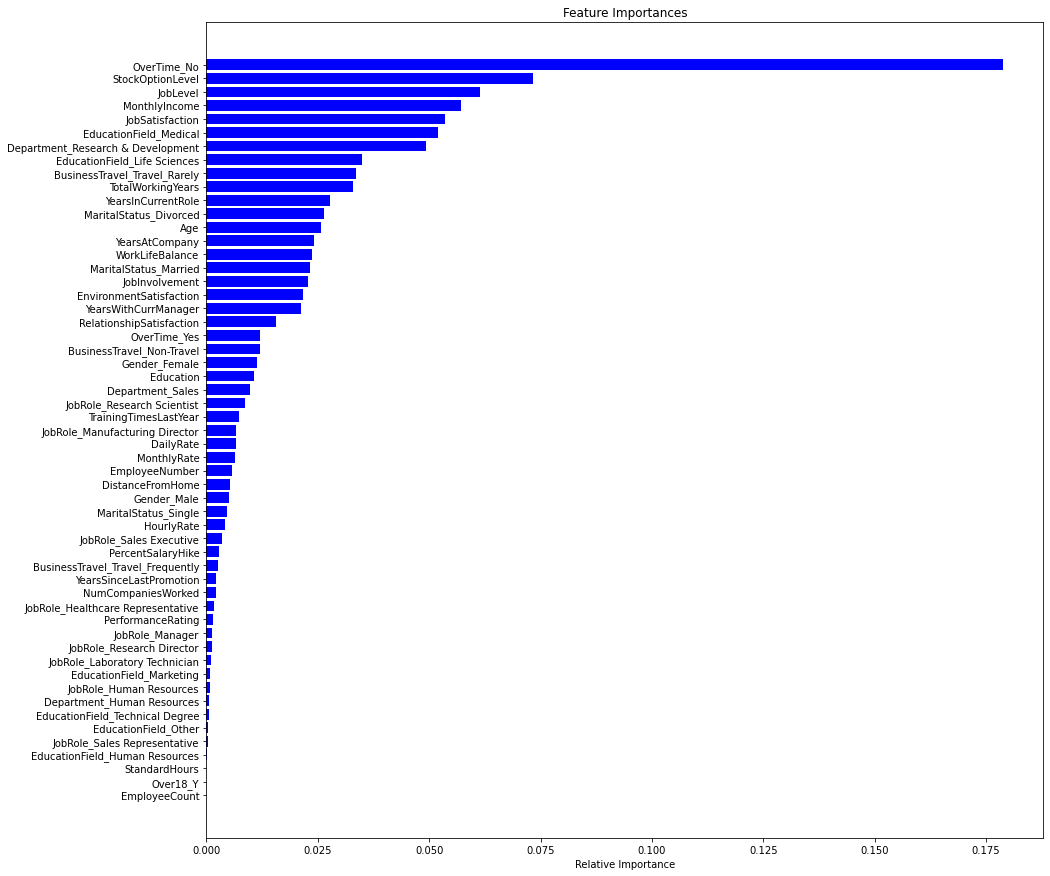

In [52]:
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

from the above graph we can say that overtime is most significant and empolyee-count is least significant.

DECISION TREE ALGO 

In [53]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
dtc_pred = dt.predict(x_test_encode)
print(dtc_pred)

[0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0]


In [56]:
print(classification_report(y_test_encode, dtc_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       245
           1       0.28      0.39      0.33        49

    accuracy                           0.73       294
   macro avg       0.58      0.60      0.58       294
weighted avg       0.77      0.73      0.75       294



accuracy for decison tree classifer is 73%

LOGISTIC REGRESSION ALGO

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(smote_train, smote_target)
classifier_pred = classifier.predict(x_test_encode)
print('Accuracy score:',accuracy_score(classifier_pred, y_test_encode))
print(classification_report(classifier_pred, y_test_encode))

Accuracy score: 0.6632653061224489
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       190
           1       0.55      0.26      0.35       104

    accuracy                           0.66       294
   macro avg       0.62      0.57      0.56       294
weighted avg       0.64      0.66      0.62       294



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy for logistic is 66%

SVC ALGO

In [61]:
from sklearn.svm import SVC
for kernel in ('linear','poly','rbf'):
    svc=SVC(kernel=kernel)
    svc.fit(smote_train, smote_target)
    svc_pred=svc.predict(x_test_encode)
    print(kernel,svc_pred) 
    print("******",kernel,"******",end=" ")

    print(classification_report(svc_pred,y_test_encode))

linear [0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
****** linear ******               precision    recall  f1-score   support

           0       0.89      0.90      0.89       242
           1       0.49      0.46      0.48        52

    accuracy                           0.82       294
   macro avg       0.69      0.68      0.68       294
weighted avg       0.82      0.82      0.82       294

poly [1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 

Comparing algos using their accuracy.

In [0]:
algos=["logistic","RFC","decisiontree","linearSVC","poly SVC","rbf svc"]
accuracy=[66,85,73,82,37,58]

Text(0.5, 1.0, 'Accuracy')

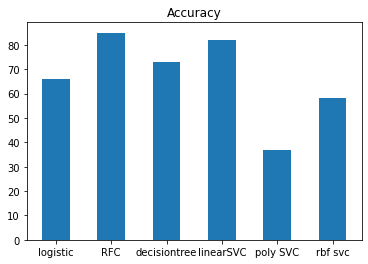

In [64]:
xpos=np.arange(len(algos))
plt.bar(xpos,accuracy,width=0.5,align="center")
plt.xticks(xpos,algos)
plt.title("Accuracy")

